https://worldhappiness.report/archive/
World Happiness Report, which uses global survey data to report how people evaluate their own lives in more than 150 countries worldwide.

Gross Domestic Product - or GDP - is simply the value of all the goods and services a country produces on a yearly basis. Divide the GDP by the total population of a country and you have the GDP per capita.
***************
Social Support:"If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?" yes=1 and no=0
***************
Healthy Life Expectancy: found by https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates

***************
Freedom to make life choices:"Are you satisfied or dissatisfied with your freedom to choose what you do with your life?" yes=1 and no=0
***************
Generosity: "Have you donated money to a charity in the past month?" yes=1 and no=0
***************
Best happiness score=10 and worst=0

# Explore Linear Regression and PCA on World Happiness Data: (LR) predicting overall happiness score of each country with 6 features and (PCA) reducing dimensionality to the most important features with respect to overall happiness score of each country

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.io as pio

#import data
df1 = pd.read_csv('2017.csv')
df2 = pd.read_csv('2018.csv')
df3 = pd.read_csv('2019.csv')
df4 = pd.read_csv('2022.csv')

# Correlation matrices: GDP, social support , and healthy life expectancy correlate the most with happiness score throughout the 4 years of data

# 2017

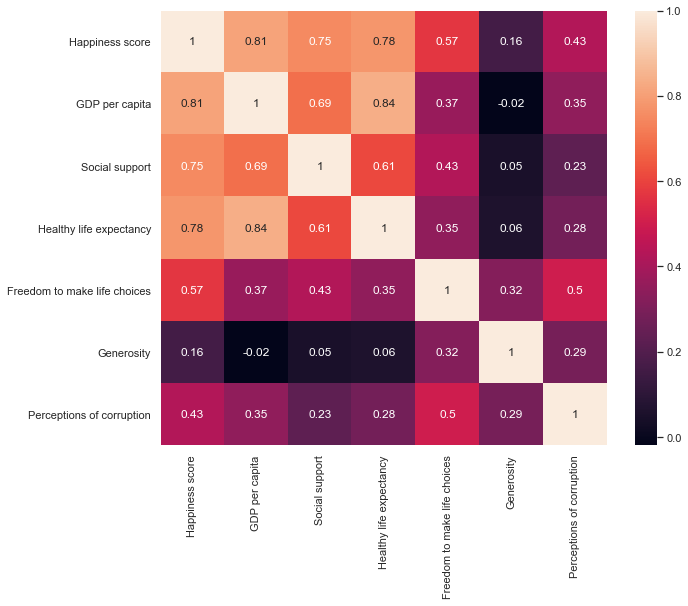

In [2]:
sns.set(rc={'figure.figsize':(10,8)})
corr_matrix1 = df1.corr().round(2)
sns.heatmap(data=corr_matrix1, annot=True)

# 2018

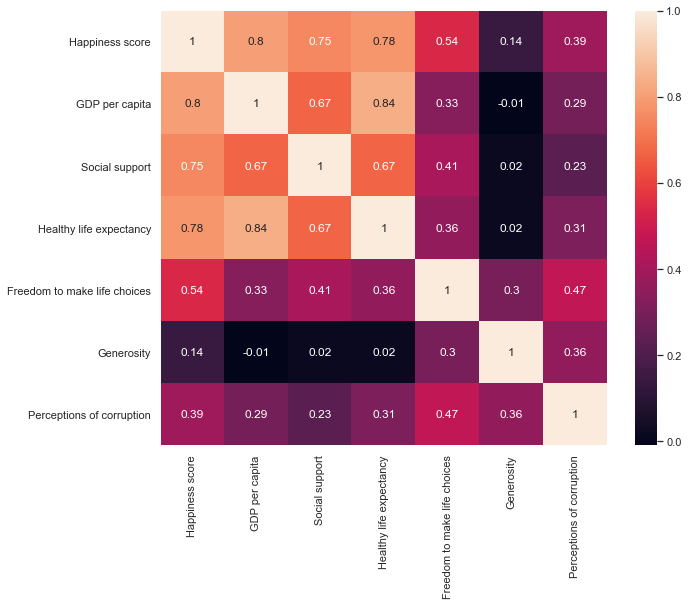

In [3]:
sns.set(rc={'figure.figsize':(10,8)})
corr_matrix2 = df2.corr().round(2)
sns.heatmap(data=corr_matrix2, annot=True)

# 2019

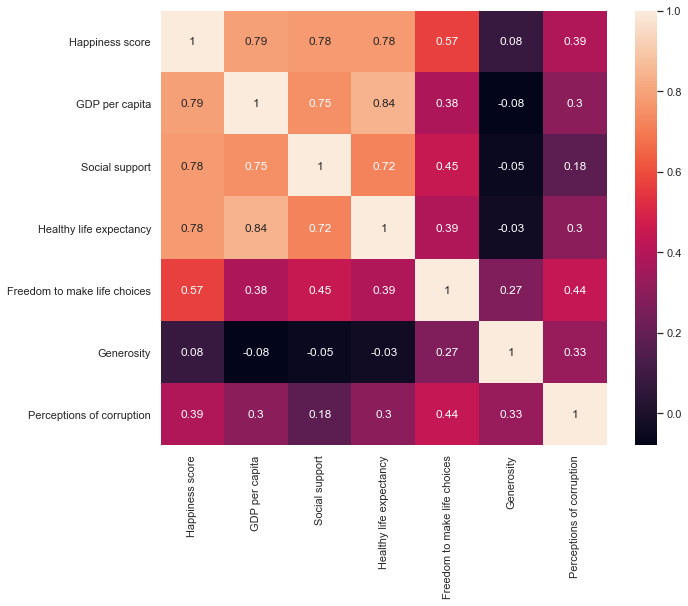

In [4]:
sns.set(rc={'figure.figsize':(10,8)})
corr_matrix2 = df3.corr().round(2)
sns.heatmap(data=corr_matrix2, annot=True)

# 2022

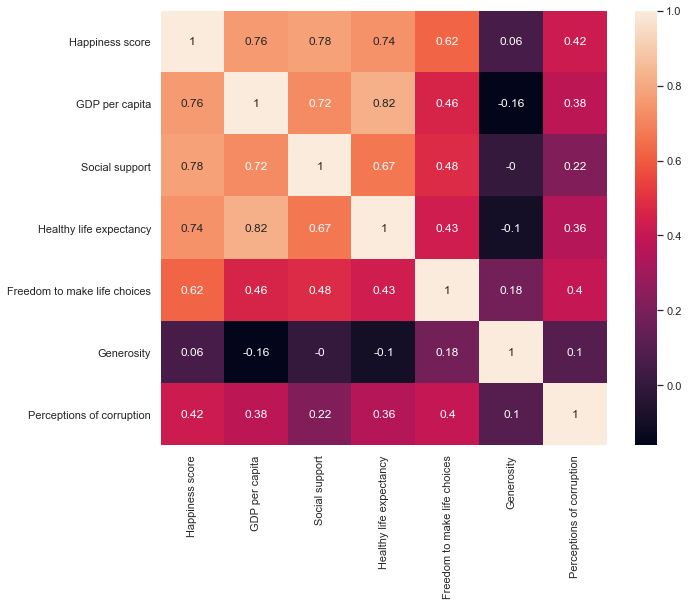

In [5]:
sns.set(rc={'figure.figsize':(10,8)})
corr_matrix2 = df4.corr().round(2)
sns.heatmap(data=corr_matrix2, annot=True)

# 2017, 2018, 2019, and 2022 combined

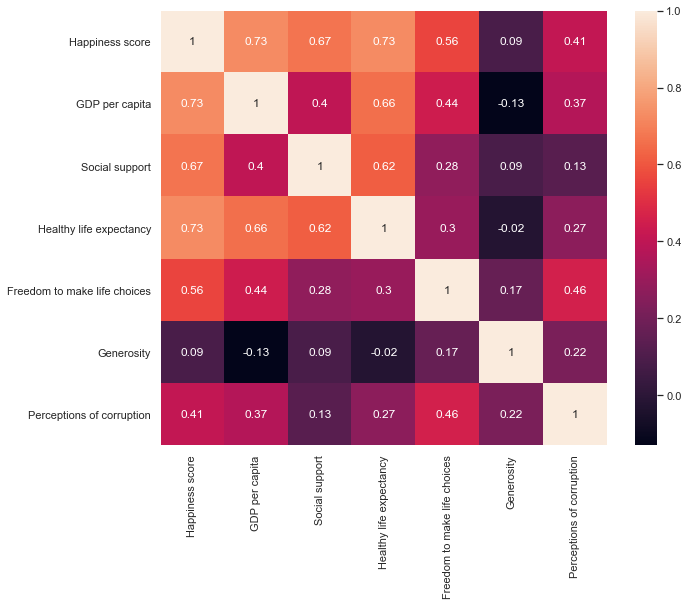

In [6]:
frames = [df1,df2,df3,df4]
happiness = pd.concat(frames)
sns.set(rc={'figure.figsize':(10,8)})
corr_matrix2 = happiness.corr().round(2)
sns.heatmap(data=corr_matrix2, annot=True)

# Plot all features with combined data set

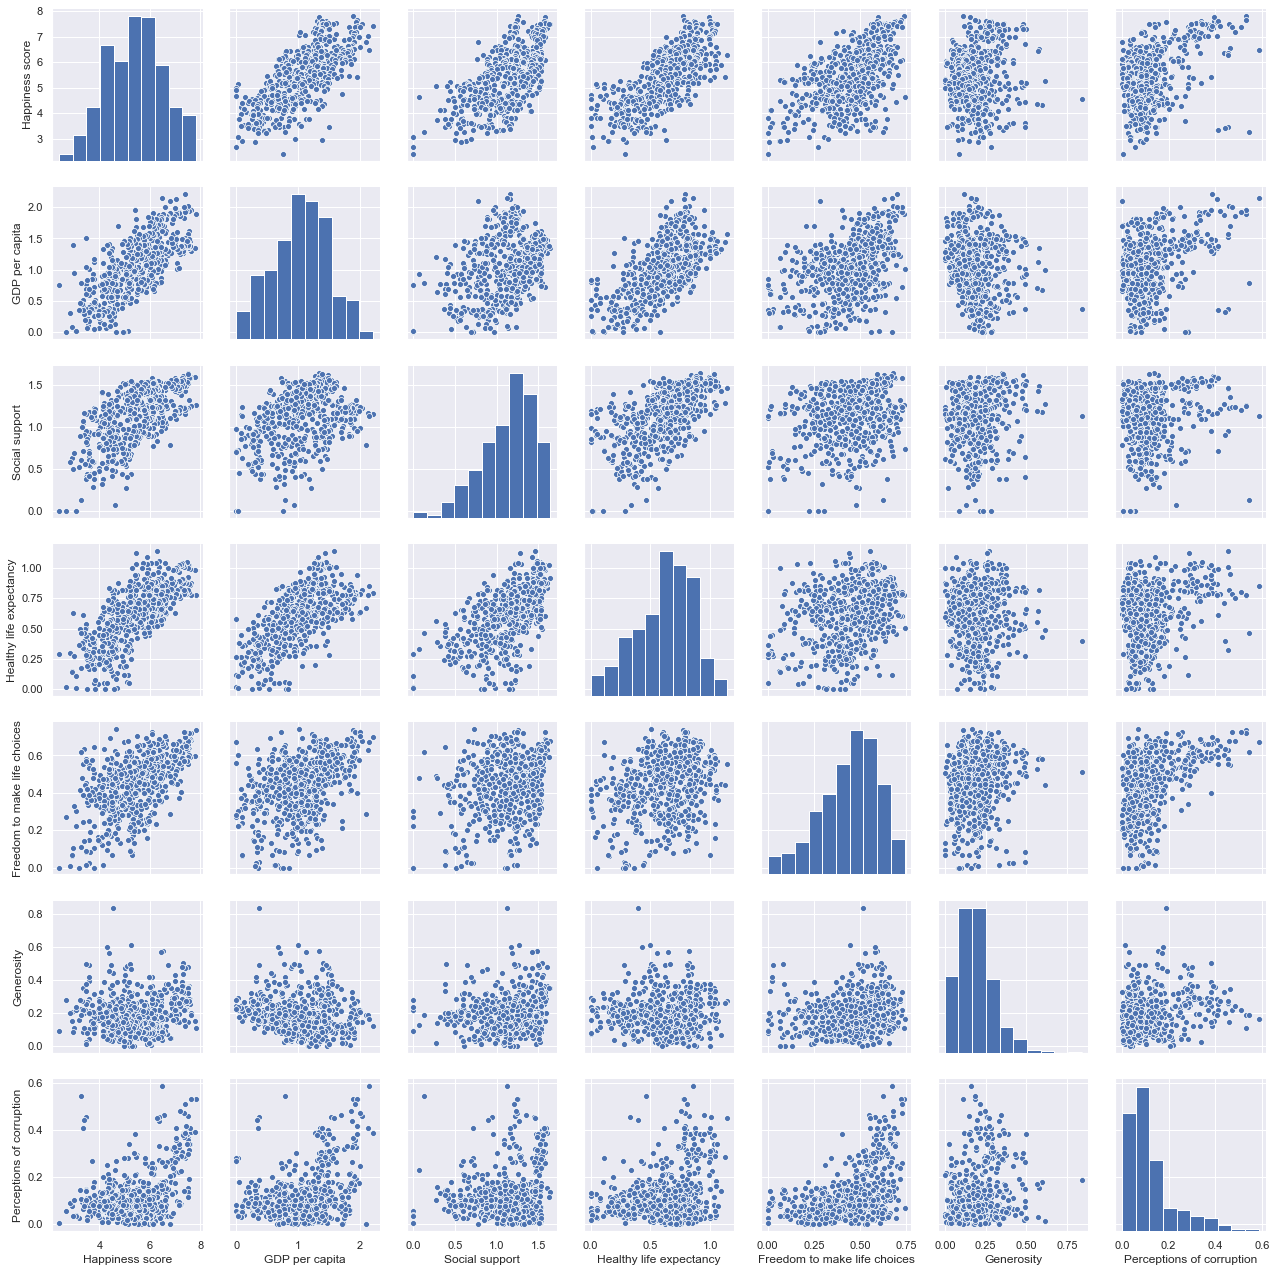

In [7]:
sns.pairplot(happiness)

# Statistics for combined dataset

In [8]:
happiness.describe()

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5.420628,1.042129,1.132742,0.615600,0.442116,0.190631,0.124457
std,1.113104,0.457769,0.318411,0.237231,0.157723,0.110596,0.106730
min,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.552000,0.730000,0.932000,0.457000,0.344000,0.109000,0.054000
50%,5.410000,1.060000,1.188000,0.643000,0.462000,0.178000,0.090000
75%,6.192000,1.361000,1.401000,0.796000,0.559000,0.249000,0.154000
max,7.821000,2.209000,1.644000,1.141000,0.740000,0.838000,0.587000


# Plot to show Happiness Score of each country

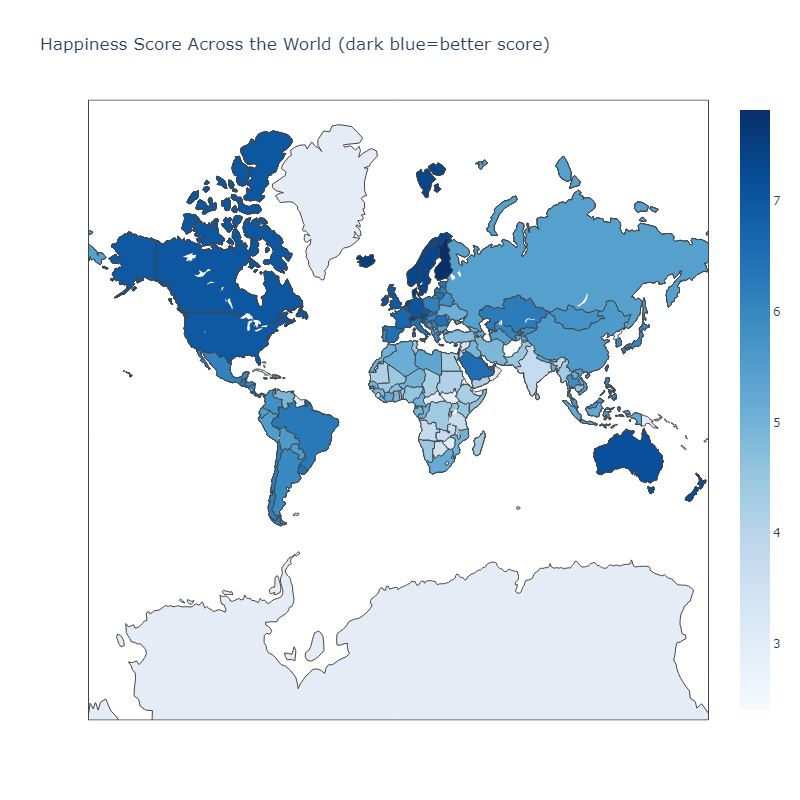

In [10]:
#make the plot not interactive 
png_renderer = pio.renderers["png"]
png_renderer.width = 800
png_renderer.height = 800
pio.renderers.default = "png"


data = dict(type = 'choropleth', 
           locations = happiness['Country'],
           locationmode = 'country names',
           z = happiness['Happiness score'], 
           text = happiness['Country'],
          colorscale = 'Blues', reversescale = False)
layout = dict(title = 'Happiness Score Across the World (dark blue=better score)',geo = dict(showframe = True, projection = {'type': 'mercator'}))
fig = go.Figure(data = [data], layout=layout)
fig.show()

# dataframes for each year and combined years dropping country and happiness score...leaving only features

In [11]:
dropped_score = happiness.drop(["Country", "Happiness score"], axis=1)
dropped_score1 = df1.drop(["Country", "Happiness score"], axis=1)
dropped_score2 = df2.drop(["Country", "Happiness score"], axis=1)
dropped_score3 = df3.drop(["Country", "Happiness score"], axis=1)
dropped_score4 = df4.drop(["Country", "Happiness score"], axis=1)

# dataframes for each year and combined years dropping country and features ...leaving happiness score

In [12]:
dropped_features = happiness.drop(['Country', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], axis=1)
dropped_features1 = df1.drop(['Country', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], axis=1)
dropped_features2 = df2.drop(['Country', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], axis=1)
dropped_features3 = df3.drop(['Country', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], axis=1)
dropped_features4 = df4.drop(['Country', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], axis=1)

# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from numpy import inf

lr = LinearRegression()
lr.fit(dropped_score, dropped_features)

LinearRegression()

In [14]:
print("Average Intercept:", lr.intercept_)
print("coefficients:", lr.coef_)

Average Intercept: [1.75770857]
coefficients: [[0.83983806 1.12661294 1.06307154 1.48057785 0.58987862 0.72374124]]


Text(0, 0.5, 'Real Happiness Score')

<Figure size 720x576 with 0 Axes>

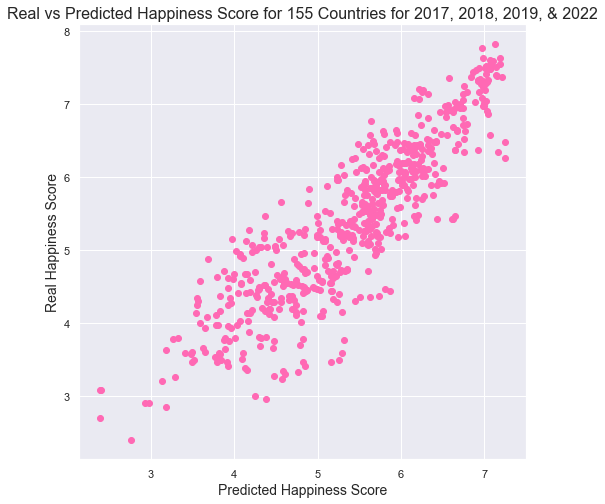

In [15]:
fig = plt.figure()
fig = plt.figure(figsize=(8,8))
plt.scatter(lr.predict(dropped_score), dropped_features, color='hotpink')
#plt.plot(lr.coef_[:,0]*dropped_score.loc[:,'GDP per capita']+lr.coef_[:,1]*dropped_score.loc[:,'Social support']+lr.coef_[:,2]*dropped_score.loc[:,'Healthy life expectancy']+lr.coef_[:,3]*dropped_score.loc[:,'Freedom to make life choices']+lr.coef_[:,4]*dropped_score.loc[:,'Generosity']+lr.coef_[:,5]*dropped_score.loc[:,'Perceptions of corruption']+lr.intercept_, dropped_features, color='k')
plt.title("Real vs Predicted Happiness Score for 155 Countries for 2017, 2018, 2019, & 2022",fontsize=16)
plt.xlabel('Predicted Happiness Score',fontsize=14)
plt.ylabel('Real Happiness Score',fontsize=14)

# Linear Regression Score (for all 4 years)

In [16]:
print('LR score:', lr.score(dropped_score, dropped_features))

LR score: 0.7872539309961373


# PCA

In [17]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
#PCA fit to the 6 features (no Country or happiness score)
pca = RandomizedPCA(n_components=6)
pca.fit(dropped_score)
DC_pca = pca.transform(dropped_score)
print(DC_pca.shape)

(613, 6)


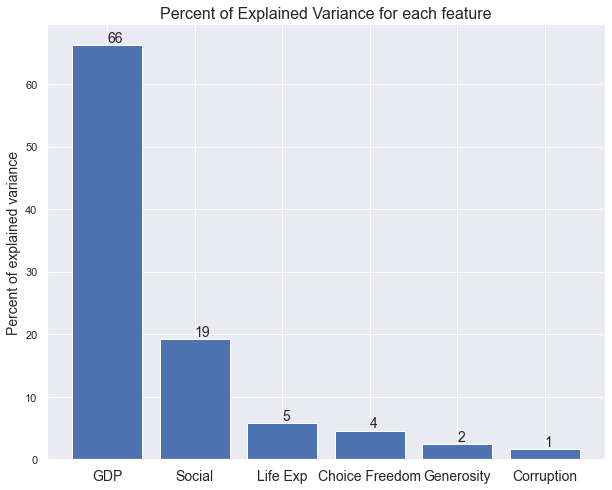

In [19]:
#plot the percent explained variance of each feature to pick which ones matter the most
bars = ('GDP', 'Social', 'Life Exp', 'Choice Freedom', 'Generosity','Corruption')
y_pos = np.arange(len(bars))
barplot = plt.bar(y_pos, pca.explained_variance_ratio_*100)

for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom',fontsize=14) #va: vertical alignment y positional argument
plt.title('Percent of Explained Variance for each feature',fontsize=16)
plt.ylabel('Percent of explained variance',fontsize=14)
plt.xticks(y_pos, bars, fontsize=14)
plt.show()

In [20]:
#PCA fit to the 2 features (no Country or happiness score)
pca2 = RandomizedPCA(n_components=2)
pca2.fit(dropped_score)
DC_pca2 = pca2.transform(dropped_score)
print(np.sum(pca2.explained_variance_ratio_)*100)

85.45867464630999


# With PCA, the dimensionality of the dataset could be reduced to 2 components (GDP and Social support) with a representation of 85% of all the information and being able to reach 91% with 3 components (GDP, social support, and Life expectancy). 